In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading in the data ##

In [3]:

import pandas as pd

# Load the dataset
file_path = 'https://raw.githubusercontent.com/nalie-linda/German_credit_risk/main/german_credit.csv'
df = pd.read_csv(file_path, encoding='utf-8')

# Display the first few rows and the summary of the dataset
df.head()


,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


### Exploratory Data Analysis

We shall use EDA to provide insight into the characteristics of the credit applicants by following the following steps;
1. Summary statistics.
2. Check distribution of credibility (target) to check for class imbalance
3. Univariate analysis by use of Distribution Plots:Plotting the distribution of key numerical features: 'Credit Amount', 'Duration of Credit (month)', and 'Age (years)'
4. Correlation Analysis:Compute the correlation matrix to identify relationships between features. This can help in understanding which features are strongly correlated and might influence each other, potentially leading to multicollinearity issues.

5. Bivariate Analysis: Explore the relationship between the target variable (Creditability) and other features.Using bar plots, boxplots, or scatter plots with different colors representing the classes.
For example:
a. Credit Amount vs. Creditability: Does the credit amount affect the likelihood of being creditworthy?
b. Duration of Credit vs. Creditability: How does the duration influence creditworthiness?



### Summary Statistics.

Summary statistics like Mean, SD, counts, minimum, and maximum values are returned for numerical values in order to identify the outliers.
In addition, Cross-tabulation of the  categorical predictors with Creditability is shown. The proportions shown in the cells are column proportions.

In [4]:
# summary of numerical features
numeric = ['Age (years)', 'Duration of Credit (month)', 'Credit Amount']
df[numeric].describe()


,Age (years),Duration of Credit (month),Credit Amount
count,1000.00000,1000.000000,1000.00000
mean,35.54200,20.903000,3271.24800
std,11.35267,12.058814,2822.75176
min,19.00000,4.000000,250.00000
25%,27.00000,12.000000,1365.50000
50%,33.00000,18.000000,2319.50000
75%,42.00000,24.000000,3972.25000
max,75.00000,72.000000,18424.00000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account Balance                    1000 non-null   int64
 2   Duration of Credit (month)         1000 non-null   int64
 3   Payment Status of Previous Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit Amount                      1000 non-null   int64
 6   Value Savings/Stocks               1000 non-null   int64
 7   Length of current employment       1000 non-null   int64
 8   Instalment per cent                1000 non-null   int64
 9   Sex & Marital Status               1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration in Current address        1000 non-null   int64
 12  Most valuable availab

In [6]:
# Create a contingency table
def cross_tabulation(target='Creditability'):

    cat_feat = ['Account Balance', 'Purpose', 'Value Savings/Stocks', 'Length of current employment',
        'Sex & Marital Status', 'Guarantors', 'Most valuable available asset','Concurrent Credits','Instalment per cent',
         'Type of apartment', 'No of Credits at this Bank', 'Occupation', 'No of dependents', 'Telephone', 'Foreign Worker']
    
    for feature in cat_feat:
        contingency_table = pd.crosstab(df[feature], df[target])
        print(contingency_table)


In [7]:
cross_tabulation(target='Creditability')

Creditability      0    1
Account Balance          
1                135  139
2                105  164
3                 14   49
4                 46  348
Creditability   0    1
Purpose               
0              89  145
1              17   86
2              58  123
3              62  218
4               4    8
5               8   14
6              22   28
8               1    8
9              34   63
10              5    7
Creditability           0    1
Value Savings/Stocks          
1                     217  386
2                      34   69
3                      11   52
4                       6   42
5                      32  151
Creditability                   0    1
Length of current employment          
1                              23   39
2                              70  102
3                             104  235
4                              39  135
5                              64  189
Creditability           0    1
Sex & Marital Status          
1               

### Distribution of creditability

The data shows more credit-worthy(1) customers than non-credit worthy customers. This signifies a class imbalance which will be treated later when preprocessing data for modelling.

Creditability
1    700
0    300
Name: count, dtype: int64


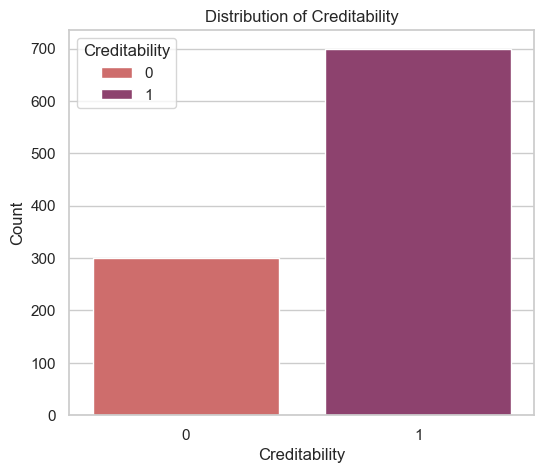

In [8]:
print(df['Creditability'].value_counts())

# Set up the visual style
sns.set(style="whitegrid")

# Plot the distribution of the target variable 'Creditability'
plt.figure(figsize=(6, 5))
sns.countplot(x='Creditability', data=df, color='c', hue='Creditability', palette="flare")  # Removed palette, using a single color
plt.title('Distribution of Creditability')
plt.xlabel('Creditability')
plt.ylabel('Count')
plt.show()


## Univariate Analysis:  Distribution of numerical features

1. Credit amount: The distribution of Credit Amount is right-skewed, meaning most credit amounts are concentrated at the lower end, with fewer instances of higher credit amounts. This could indicate that most customers tend to take smaller loans, while a smaller number opts for larger amounts. 

2. Duration of Credit (month) feature shows a distribution that is somewhat uniform with a slight right skew. Many credits have durations around 12 to 24 months, suggesting that medium-term loans are more common. The long tail in higher durations may represent fewer customers with long-term loans.

3. The age distribution appears to be approximately normal, centered around 30-40 years, with a slight left skew. This suggests that most customers are middle-aged, with fewer younger and older customers applying for credit. The range spans from younger adults to seniors, indicating a broad age demographic in the dataset.

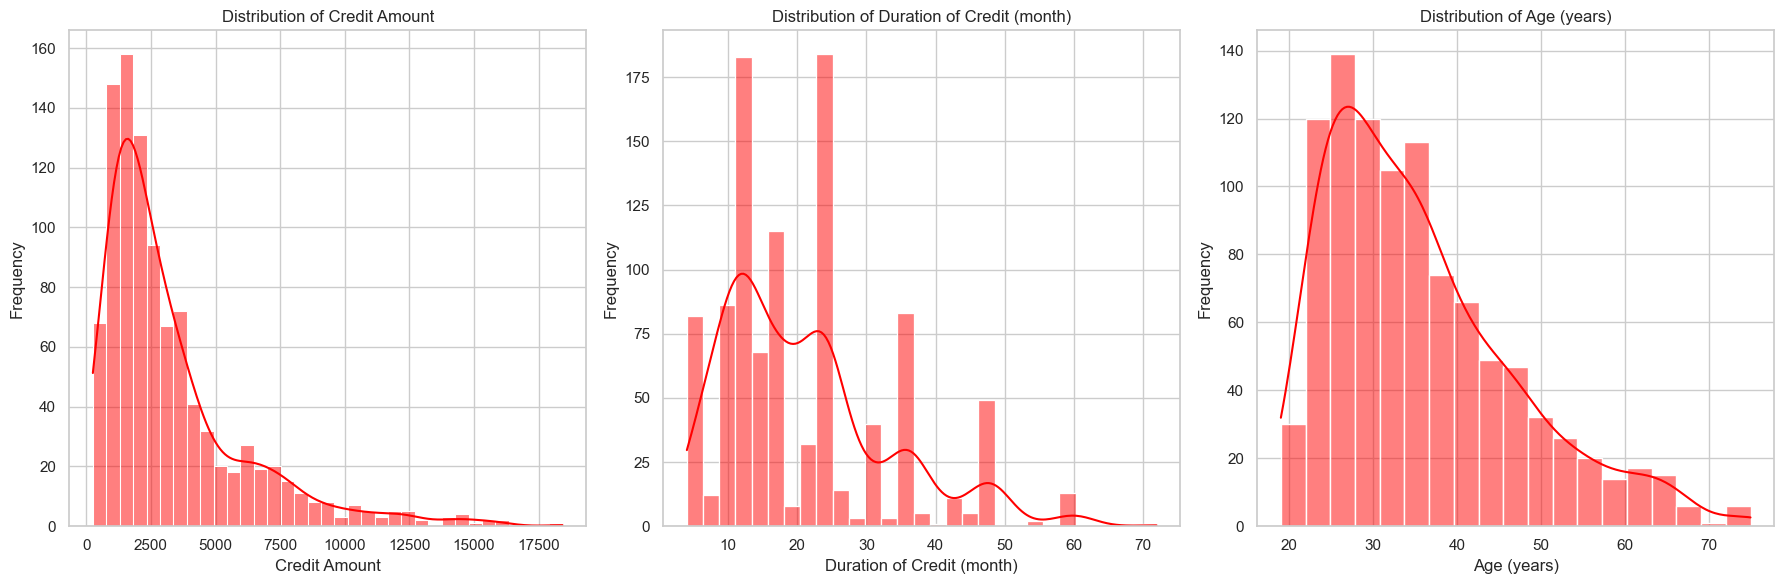

In [9]:

sns.set(style="whitegrid")

# List of key numerical features to plot
features = ['Credit Amount', 'Duration of Credit (month)', 'Age (years)']

plt.figure(figsize=(18, 6))

for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[feature], kde=True, color='red')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Correlation analysis

Credit duration and duration of credit have moderate positive correlation. Higher credit amounts tend to have 
Longer credit durations and the reverse is true for smaller credit amounts.

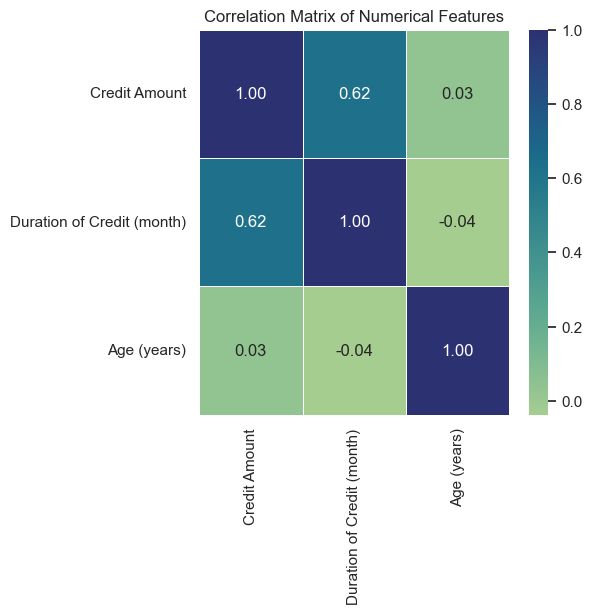

In [10]:
# Correlation analysis of the numerical features

# Compute the correlation matrix
numerical_df = df[['Credit Amount', 'Duration of Credit (month)', 'Age (years)']]
corr_matrix = numerical_df.corr()

# Set up the visual style for the heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='crest', linewidths=0.5)

plt.title('Correlation Matrix of Numerical Features')
plt.show()




###  Bivariate analysis: The distribution of Credit Amount  between Creditability:

1. Creditworthy individuals (Creditability = 1) tend to have a lower median credit amount than non-creditworthy individuals (Creditability = 0).
This indicates that individuals with higher credit amounts may be more likely to default.
2. Both categories show a wide spread of credit amounts, but non-creditworthy individuals exhibit a wider interquartile range (IQR), indicating more variability in their credit amounts.
3. There are numerous outliers in both groups, particularly for larger credit amounts. The non-creditworthy group (Creditability = 0) shows many outliers beyond 10,000, while the creditworthy group has outliers, though fewer in number at the higher credit amounts.
4. Generally, the creditworthy group tends to have smaller credit amounts, suggesting that lower credit amounts may be a factor associated with creditworthiness.


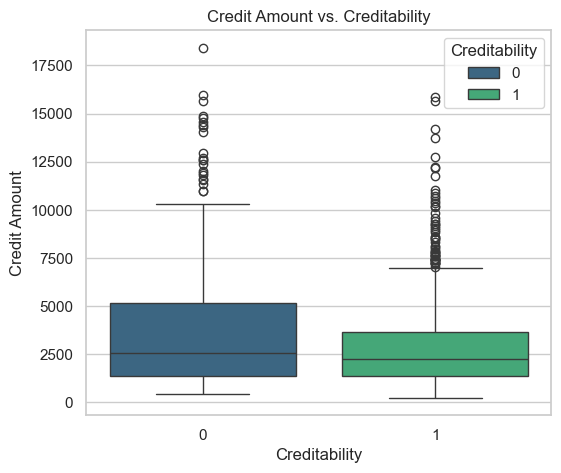

In [11]:

# Set up the visual style
sns.set(style="whitegrid")

# Bivariate Analysis: Credit Amount vs. Creditability
plt.figure(figsize=(6, 5))
sns.boxplot(x='Creditability', y='Credit Amount', data=df, hue= 'Creditability', palette='viridis')
plt.title('Credit Amount vs. Creditability')
plt.xlabel('Creditability')
plt.ylabel('Credit Amount')
plt.show()




### Bivariate Analysis: Age vs. Creditability

1. The median age of creditworthy individuals (Creditability = 1) is slightly higher than that of non-creditworthy individuals (Creditability = 0).This suggests that slightly older individuals tend to be more creditworthy.
2. Both categories have a wide spread of ages. The interquartile ranges (IQRs) are somewhat similar, meaning there is a comparable variation in the ages of individuals in both creditworthy and non-creditworthy groups.
3. Both groups show outliers, particularly at the upper end of the age distribution. The creditworthy group has a few outliers in the 65–70 range, while the non-creditworthy group also has several outliers above 60.
4. The overall age range for both groups is broad, spanning from around 20 to 70 years. This indicates that individuals across various age groups can fall into either creditworthy or non-creditworthy categories.

Above Plot suggests that older individuals may have a slightly higher likelihood of being creditworthy, but overall, age does not seem to be a very strong differentiating factor for creditworthiness. The similar distribution of ages across both groups indicates that other factors, beyond age, play a more significant role in determining creditability.

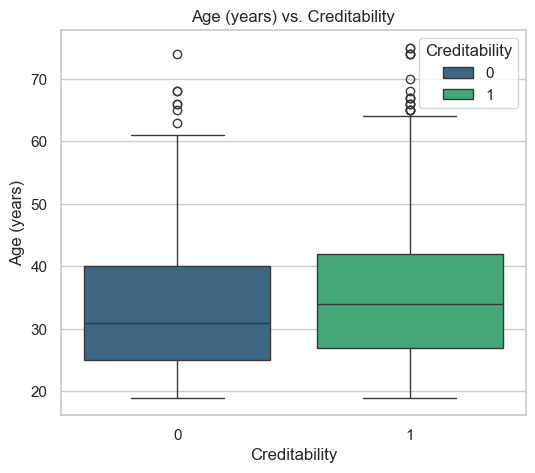

In [12]:

# Bivariate Analysis: Age vs. Creditability
plt.figure(figsize=(6, 5))
sns.boxplot(x='Creditability', y='Age (years)', data=df, hue= 'Creditability', palette='viridis')
plt.title('Age (years) vs. Creditability')
plt.xlabel('Creditability')
plt.ylabel('Age (years)')
plt.show()

### Bivariate Analysis: Credit Amount and Duration of Credit (in months)

The scatter plot shows the relationship between Credit Amount and Duration of Credit (in months), with points colored by Creditability.
1. Credit Amount: Most credit amounts are concentrated between 0 and 5000, with a few outliers beyond 10,000. This range contains both creditworthy and non-creditworthy individuals.
2. Duration of Credit: The credit durations are mostly below 40 months, with very few loans having durations above 50 months. Both creditworthy and non-creditworthy individuals have similar ranges in credit duration.
3. Creditability: For lower credit amounts (below 5000), creditworthiness and non-creditworthiness seem evenly distributed across various durations of credit. As credit amounts increase (above 10,000), there are more non-creditworthy individuals. This indicates that higher loan amounts, especially with longer durations, are more likely to be associated with credit risk.
4. Shorter loan durations (below 20 months) tend to have a higher concentration of creditworthy individuals (green points) even at higher credit amounts while longer durations (above 40 months) see more non-creditworthy individuals, especially at higher credit amounts.
5. There are some outliers at the very high credit amounts (above 12,000) with both long and short durations. Most of these outliers are non-creditworthy (Creditability = 0), which suggests that high credit amounts with both very short and very long repayment durations may be more risky.

Higher credit amounts and longer credit durations seem to be associated with a greater risk of non-creditworthiness. Conversely, smaller credit amounts, especially for shorter loan durations, show a more balanced or favorable distribution of creditworthiness.
This analysis suggests that financial institutions may need to scrutinize longer loan durations and higher amounts more carefully, as these factors may increase the likelihood of default or credit risk.

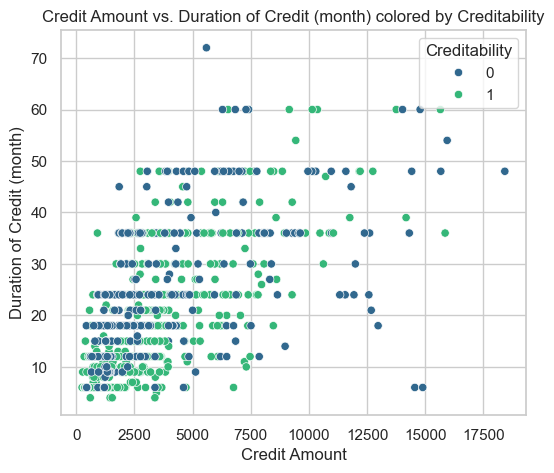

In [13]:
#
# Scatter Plot: Credit Amount vs. Duration of Credit colored by Creditability
plt.figure(figsize=(6, 5))
sns.scatterplot(x='Credit Amount', y='Duration of Credit (month)', hue='Creditability', data=df, palette='viridis')
plt.title('Credit Amount vs. Duration of Credit (month) colored by Creditability')
plt.xlabel('Credit Amount')
plt.ylabel('Duration of Credit (month)')
plt.show()



### Bivariate Analysis: Credit Amount and Age (years)

This scatter plot shows the relationship between Age (in years) and Credit Amount. The points are colored based on Creditability, where blue represents 0 (not-creditworthy) and green represents 1 (creditworthy).
1. Distribution: There's a higher concentration of data points for lower credit amounts (below 5000) across all ages.
2. Age and credit amount: There doesn't appear to be a strong linear relationship between age and credit amount. However, the highest credit amounts tend to be for individuals in their 30s to 50s.
3. Creditability: Both creditworthy (green) and less creditworthy (blue) individuals are spread across all age groups and credit amounts.
4. Outliers: There are some notable outliers with very high credit amounts (above 15,000) across different age groups.
5. Density: The density of points is highest for younger ages (20-40) and lower credit amounts, suggesting more credit applications or approvals in this range.
6. Variability: Credit amounts seem to have higher variability for middle-aged individuals (30-50 years old) compared to very young or older individuals.

This plot suggests that age and credit amount alone may not be strong predictors of creditworthiness, as there's significant overlap between the two creditability categories across the age and credit amount spectrum. Other factors likely play important roles in determining creditworthiness.

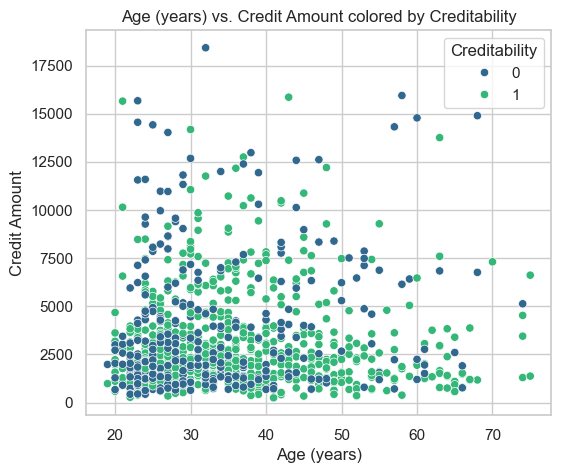

In [14]:
# Scatter Plot: Age vs. Credit Amount colored by Creditability
plt.figure(figsize=(6, 5))
sns.scatterplot(x='Age (years)', y='Credit Amount', hue='Creditability', data=df, palette='viridis')
plt.title('Age (years) vs. Credit Amount colored by Creditability')
plt.xlabel('Age (years)')
plt.ylabel('Credit Amount')
plt.show()

### Bivariate Analysis: Creditability distribution across foreign/local workers.
Heatmap illustrates the percentage distribution of foreign workers based on their creditability status

1. Non-foreign workers have a significantly higher rate of creditworthiness (89.19%) compared to foreign workers (69.26%).
Foreign workers are almost three times more likely to be considered less creditworthy (30.74%) compared to non-foreign workers (10.81%).
Overall, both groups have a higher percentage of creditworthy individuals, but the difference is more pronounced for non-foreign workers.
2. There appears to be a correlation between foreign worker status and creditworthiness, with non-foreign workers generally being viewed as more creditworthy. This could be due to various factors such as job stability, income levels, length of credit history, or potentially some bias in the credit assessment process.
Overall this highlights a significant disparity in creditworthiness between foreign and non-foreign workers, which could be an important factor to consider in credit risk assessment and potential issues of fairness in lending practices.

Creditability           0          1
Foreign Worker                      
1               30.737279  69.262721
2               10.810811  89.189189


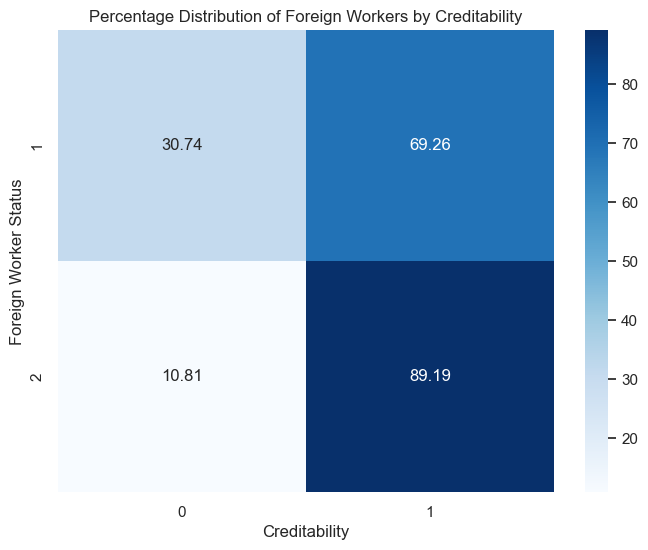

In [15]:

# Creditability distribution across foreign/local workers.

cross_tab = pd.crosstab(df['Foreign Worker'], df['Creditability'], normalize='index') * 100

# Display the cross-tabulation matrix with percentage frequencies
print(cross_tab)

# Plotting the matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, fmt=".2f", cmap='Blues')
plt.title('Percentage Distribution of Foreign Workers by Creditability')
plt.xlabel('Creditability')
plt.ylabel('Foreign Worker Status')
plt.show()


### Bivariate Analysis: creditability distribution across marital status/ sex

1. Male-married / widowed(Category 3): Has the largest number of Creditworthy individuals, with more than 400 in the Creditworthy group and around 150 in the Non-Creditworthy group.
2. single males(category 2)  are more Creditworthy individuals (~200) than Non-Creditworthy (~100).
3. male: divorced / living apart( category 1) individuals have relatively low numbers, with very few individuals in both groups.(creditworthy and non creditworthy.)
4. Females (Category 4): Has a small number of individuals, but the Non-Creditworthy group slightly outnumbers the Creditworthy group.


Creditability                 0          1
Sex & Marital Status                      
1                     40.000000  60.000000
2                     35.161290  64.838710
3                     26.642336  73.357664
4                     27.173913  72.826087


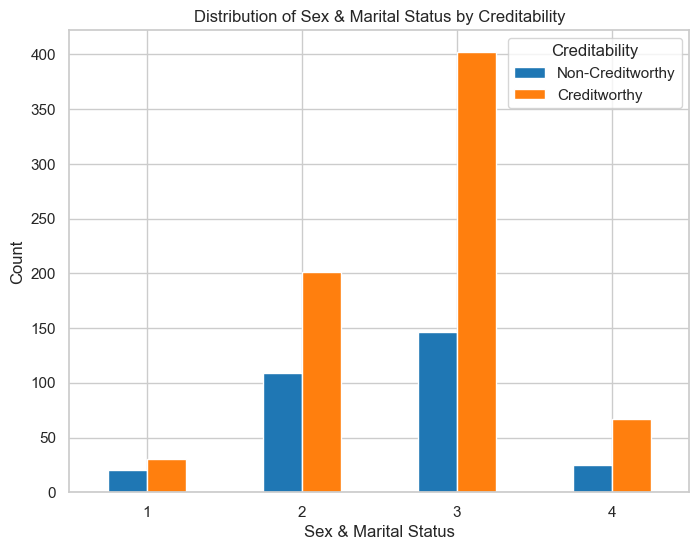

In [16]:
# creditability distribution across marital status/ sex

cross_tab = pd.crosstab(df['Sex & Marital Status'], df['Creditability'], normalize='index') * 100

# Display the cross-tabulation matrix with percentage frequencies
print(cross_tab)

# Group the data by foreign worker and creditability and get the count
grouped_data = df.groupby(['Sex & Marital Status', 'Creditability']).size().unstack()

# Plotting the bar graph
grouped_data.plot(kind='bar', stacked=False, figsize=(8, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('Distribution of Sex & Marital Status by Creditability')
plt.xlabel('Sex & Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Creditability', labels=['Non-Creditworthy', 'Creditworthy'])
plt.show()

## Chi-square test for categorical variables 
Perform a chi-square test for categorical variables to determine their interaction with the response variable. A low p-value (typically < 0.05) suggests that the categorical variable is dependent on the response (Creditability), implying there is a statistically significant relationship.A high p-value (> 0.05) suggests independence.The lower the p-value, the more significant the relationship between the categorical feature and Creditability.

In [17]:
import pandas as pd
from scipy.stats import chi2_contingency

# List of categorical features
categorical_features = ['Account Balance', 'Purpose', 'Value Savings/Stocks', 'Length of current employment',
        'Instalment per cent', 'Sex & Marital Status', 'Guarantors', 'Duration in Current address', 'Most valuable available asset',
        'Concurrent Credits', 'Type of apartment', 'No of Credits at this Bank', 'Occupation', 'No of dependents', 'Telephone', 'Foreign Worker']

# Function to perform Chi-Square test
def chi_square_test(feature, target='Creditability'):
    # Create a contingency table
    contingency_table = pd.crosstab(df[feature], df[target])
    
    # Perform the Chi-Square test
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    
    return chi2, p

# Loop through all categorical features and perform the test
chi_square_results = {}

for feature in categorical_features:
    chi2, p_value = chi_square_test(feature)
    chi_square_results[feature] = {'chi2_stat': chi2, 'p_value': p_value}

chi_square_df = pd.DataFrame(chi_square_results).T
chi_square_df = chi_square_df.sort_values(by='p_value')
print(chi_square_df)


                                chi2_stat       p_value
Account Balance                123.720944  1.218902e-26
Value Savings/Stocks            36.098928  2.761214e-07
Most valuable available asset   23.719551  2.858442e-05
Type of apartment               18.674005  8.810311e-05
Purpose                         33.356447  1.157491e-04
Length of current employment    18.368274  1.045452e-03
Concurrent Credits              12.839188  1.629318e-03
Foreign Worker                   5.821576  1.583075e-02
Sex & Marital Status             9.605214  2.223801e-02
Guarantors                       6.645367  3.605595e-02
Instalment per cent              5.476792  1.400333e-01
Telephone                        1.172559  2.788762e-01
No of Credits at this Bank       2.671198  4.451441e-01
Occupation                       1.885156  5.965816e-01
Duration in Current address      0.749296  8.615521e-01
No of dependents                 0.000000  1.000000e+00


## Data Preprocessing
The data is prepared for model building by;

1. Scaling the numerical feartures such that they fall within the same range.
2. Encoding categorical variables
3. checking for correlated features.

The preprocessing follows the following steps.
1. Define the processing pipeline: Transformers for numerical and categorical features.
2. Fit and Transform the Data: Fit the preprocessor on the DataFrame and transform it.
3. Retrieve the Actual Feature Names: concatenate the numerical feature names and the output feature names of the OneHotEncoder.

In [18]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [19]:
df1 = df.copy(deep=True)
print(df1.columns)

Index(['Creditability', 'Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker'],
      dtype='object')


In [20]:
categories = categorical_features 
numeric_features = numeric

# Define transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [21]:
# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numeric_features),
        ('cat', categorical_transformer, categories)
    ])

In [22]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age (years)', 'Duration of Credit (month)',
                                  'Credit Amount']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Account Balance', 'Purpose',
                                  'Value Savings/Stocks',
                                  'Length of current employment',
                                  'Instalment per cent', 'Sex & Marital Status',
                                  'Guarantors', 'Duration in Current address',
                                  'Most valuable available asset',
                                  'Concurrent Credits', 'Type of apartment',
                                  'No of Credits at this Bank', 'Occupation',
                                  'No of dependents', 'Telephone',
                                  'Foreign Worker'])])

In [23]:
# Apply the transformations
df_preprocessed = preprocessor.fit_transform(df1)
df_preprocessed

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 19000 stored elements and shape (1000, 66)>

In [24]:
categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categories)

all_feature_names = list(numeric_features) + list(categorical_feature_names )
print(len(all_feature_names))

66


In [25]:
# Create a DataFrame with proper column names
df_preprocessed1 = pd.DataFrame(data=df_preprocessed.toarray(), columns=all_feature_names)

print(df_preprocessed1)

     Age (years)  Duration of Credit (month)  Credit Amount  \
0      -1.281573                   -0.240857      -0.787657   
1       0.040363                   -0.987573      -0.167384   
2      -1.105315                   -0.738668      -0.861381   
3       0.304750                   -0.738668      -0.407341   
4       0.216621                   -0.738668      -0.389974   
..           ...                         ...            ...   
995    -1.281573                    0.256953      -0.455191   
996     0.833525                    0.256953      -0.343187   
997    -0.488411                    0.008048       3.334852   
998     1.450428                   -0.738668       1.133062   
999    -0.400282                    0.754763       1.091237   

     Account Balance_1  Account Balance_2  Account Balance_3  \
0                  1.0                0.0                0.0   
1                  1.0                0.0                0.0   
2                  0.0                1.0          

## Feature Importance and Selection

The most important features are computed by training a random forest classifier. This is based on mean decrease in impurity and the importance of a feature is the average of all the impurity decreases attributed to that feature across all trees.

In [26]:
# compute feature importance using Random forests

from sklearn.ensemble import RandomForestClassifier

# Assume target variable is 'success_x'
X = df_preprocessed1
y = df['Creditability']

# Fit a Random Forest model
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Map importances to feature names
feature_names = numeric_features + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features))
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort by importance
feature_importances = feature_importances.sort_values(by='importance', ascending=False)
print(feature_importances)

                         feature  importance
2                  Credit Amount    0.098868
1     Duration of Credit (month)    0.084399
0                    Age (years)    0.078431
6              Account Balance_4    0.048170
3              Account Balance_1    0.045598
..                           ...         ...
56                  Occupation_1    0.002556
16                    Purpose_10    0.002243
11                     Purpose_4    0.001288
55  No of Credits at this Bank_4    0.001093
14                     Purpose_8    0.000697

[66 rows x 2 columns]


In [27]:
feature_importances.head(20)

,feature,importance
2,Credit Amount,0.098868
1,Duration of Credit (month),0.084399
0,Age (years),0.078431
6,Account Balance_4,0.048170
3,Account Balance_1,0.045598
17,Value Savings/Stocks_1,0.019314
30,Instalment per cent_4,0.019030
4,Account Balance_2,0.018138
7,Purpose_0,0.016886
44,Most valuable available asset_3,0.016439


In [28]:
#selecting top 20 important features

X_selected_features = ['Credit Amount','Age (years)','Duration of Credit (month)', 'Account Balance_4',
        'Account Balance_1','Value Savings/Stocks_1', 'Instalment per cent_4', 
        'Type of apartment_2','Account Balance_2', 'Purpose_0', 'Sex & Marital Status_2',
         'Occupation_3', 'Most valuable available asset_1', 'Concurrent Credits_3', 
        'Duration in Current address_2', 'Most valuable available asset_2', 'Value Savings/Stocks_5',
        'Length of current employment_2', 'Purpose_3', 'Sex & Marital Status_3']

### Modelling and Evaluation
A Baseline logistic regression model and accurate model are built. Since there's a class imbalance, SMOTE technique is applied.

1. Baseline logistic regression model applying SMOTE to balance the classes.
2. fitting a second logistic regression with only significant features.

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.metrics import  roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


# Initialize and train the model
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred = model.predict(X_test)

# # Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.705
              precision    recall  f1-score   support

           0       0.52      0.65      0.58        62
           1       0.82      0.73      0.77       138

    accuracy                           0.70       200
   macro avg       0.67      0.69      0.67       200
weighted avg       0.73      0.70      0.71       200

[[ 40  22]
 [ 37 101]]


In [30]:
# define a new feature matrix and target with only selected features
X1 = df_preprocessed1[X_selected_features]
y1 = df1['Creditability']


# Split the data into training and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X1_train_smote, y1_train_smote = smote.fit_resample(X1_train, y1_train)


# Initialize and train the model
model1 = LogisticRegression(class_weight='balanced', random_state=42)
model1.fit(X1_train_smote, y1_train_smote)

# Make predictions
y1_pred = model1.predict(X1_test)

# # Evaluate the model
print('Accuracy:', accuracy_score(y1_test, y1_pred))
print(classification_report(y1_test, y1_pred))
print(confusion_matrix(y1_test, y1_pred))

Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.57      0.69      0.62        62
           1       0.85      0.76      0.80       138

    accuracy                           0.74       200
   macro avg       0.71      0.73      0.71       200
weighted avg       0.76      0.74      0.75       200

[[ 43  19]
 [ 33 105]]


The second regression model (model1) shows better improvement in accuracy than the first one. This is because we use only the most important features.

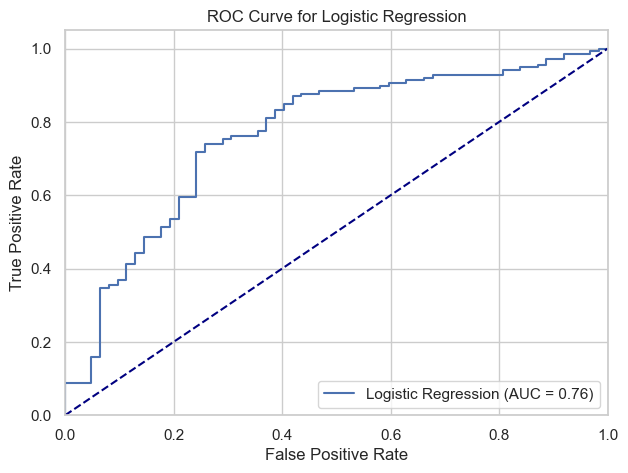

In [31]:

# Predict probabilities for the test set
y_pred_prob = model1.predict_proba(X1_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y1_test, y_pred_prob)
roc_auc = roc_auc_score(y1_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

ROC Curve: The ROC curve is plotted by using roc_curve to get the false positive rate (FPR) and true positive rate (TPR).
AUC (Area Under the Curve): The AUC score is calculated using roc_auc_score, which tells you how well the model distinguishes between the classes.This logistic regression model is 76% accurate in distingushing defaulters and non-defaulters.

### Fitting other classification models.

Other algorithms are fitted in order to get a more accurate predictive model that accurately predicts likelihood of default for loan borrowers.
Algorithms include; LDA, Gradient_boost, XGboost and Random forest classifier.

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

In [33]:
X2 = df1.drop(['Creditability'], axis=1)
y2 = df1['Creditability']

# Encode categorical variables
X2 = pd.get_dummies(X2, drop_first=True)
label_encoder = LabelEncoder()
y2 = label_encoder.fit_transform(y2)

# Split the data into training and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, stratify=y2, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)

# Apply SMOTE
smote = SMOTE(random_state=42)
X2_train_smote, y2_train_smote = smote.fit_resample(X2_train, y2_train)

# dictionary to store the models
models = {
    'LDA': LinearDiscriminantAnalysis(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss'),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}

# Function to fit the model and evaluate
def fit_and_evaluate(model2, X2_train, X2_test, y2_train, y2_test):
    # Fit the model
    model2.fit(X2_train, y2_train)
    # Make predictions
    y2_pred = model2.predict(X2_test)
    # Calculate accuracy and ROC AUC
    accuracy = accuracy_score(y2_test, y2_pred)
    roc_auc = roc_auc_score(y2_test, model2.predict_proba(X2_test)[:, 1])
    print(f"Accuracy: {accuracy:.4f}, ROC AUC: {roc_auc:.4f}")
    print(confusion_matrix(y2_test, y2_pred))
    print(classification_report(y2_test, y2_pred))
    return accuracy, roc_auc

# Loop through models and print performance metrics
for name, model in models.items():
    print(f"\n{name}")
    fit_and_evaluate(model, X2_train, X2_test, y2_train, y2_test)



LDA
Accuracy: 0.7750, ROC AUC: 0.8168
[[ 30  30]
 [ 15 125]]
              precision    recall  f1-score   support

           0       0.67      0.50      0.57        60
           1       0.81      0.89      0.85       140

    accuracy                           0.78       200
   macro avg       0.74      0.70      0.71       200
weighted avg       0.76      0.78      0.76       200


Gradient Boosting
Accuracy: 0.7900, ROC AUC: 0.8194
[[ 34  26]
 [ 16 124]]
              precision    recall  f1-score   support

           0       0.68      0.57      0.62        60
           1       0.83      0.89      0.86       140

    accuracy                           0.79       200
   macro avg       0.75      0.73      0.74       200
weighted avg       0.78      0.79      0.78       200


XGBoost
Accuracy: 0.7500, ROC AUC: 0.7839
[[ 32  28]
 [ 22 118]]
              precision    recall  f1-score   support

           0       0.59      0.53      0.56        60
           1       0.81      0.84

In [34]:
rf_model =  RandomForestClassifier(n_estimators=100)
rf_model .fit(X2_train_smote, y2_train_smote)

RandomForestClassifier()

ROC Curve for Random Forest Model.

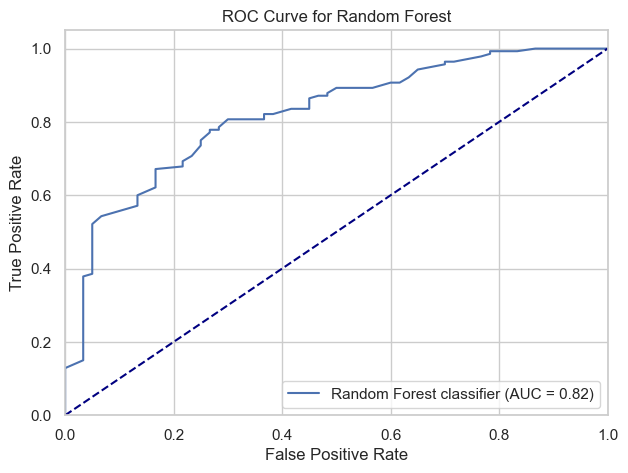

In [35]:
y2_pred = rf_model.predict(X2_test)

# Predict probabilities for the test set
y2_pred_prob = rf_model.predict_proba(X2_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y2_test, y2_pred_prob)
roc_auc = roc_auc_score(y2_test, y2_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'Random Forest classifier (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Model results interpretation Random Forest
The overall accuracy of 0.790 indicates that the model correctly predicts creditability 79% of the time.


### Performing statistical tests to compare both logistic and random Forest.
McNemar's Test (for classification agreement): This test is useful to assess whether there is a significant difference in the performance of two models on the same dataset (using their classification results). The test is used to test whether one model classifies more individuals correctly than the other, in this case test is based on the confusion matrices.

The variables for the test are set up as follows;

1. both_correct: Counts the cases where both models correctly predicted the same outcome.
2. both_incorrect: Counts the cases where both models made the same incorrect prediction.
3. lr_correct_rf_incorrect: Counts the cases where the logistic regression model predicted correctly, but random forest did not.
4. rf_correct_lr_incorrect: Counts the cases where random forest predicted correctly, but logistic regression did not.

In [46]:
from sklearn.metrics import confusion_matrix
from statsmodels.stats.contingency_tables import mcnemar

# suppose y_test is the true labels, y1_pred is the predictions from the logistic regression,
# and y2_pred is the predictions from the random forest

# Step 1: Compare the two models' predictions with the true labels
both_correct = sum((y1_pred == y_test) & (y2_pred == y_test))  # Both correct
both_incorrect = sum((y1_pred != y_test) & (y2_pred != y_test))  # Both incorrect
lr_correct_rf_incorrect = sum((y1_pred == y_test) & (y2_pred != y_test))  # LR correct, RF incorrect
rf_correct_lr_incorrect = sum((y2_pred == y_test) & (y1_pred != y_test))  # RF correct, LR incorrect

# Step 2: Create the contingency table
contingency_table = [[both_correct, lr_correct_rf_incorrect],
                     [rf_correct_lr_incorrect, both_incorrect]]

print (contingency_table)


significance_value = 0.05

# Step 3: Run McNemar's test
result = mcnemar(contingency_table, exact=False)   
print(f"Statistic: {result.statistic:.5f}, p-value: {result.pvalue:.5f}")

if result.pvalue < significance_value:
  print("Reject Null hypothesis")
else:
  print("Fail to reject Null hypothesis")



[[90, 58], [30, 22]]
Statistic: 8.28409, p-value: 0.00400
Reject Null hypothesis


Interpretation of test
p-value < 0.05: Significant difference between the logistic and Random Forest models, meaning their predictions are not similar thus their performance is different.

## Comparison based on interpretability.

Interpretability is a key factor in assessing models for credit risk, especially for stakeholders such as regulators or credit officers.
Logistic regression has high interpretability, since the coefficients are easily explained.  we can justify model's decisions by showing how each feature (e.g., credit amount, age, duration) impacts creditworthiness.

Coefficient Analysis:  coefficients and their odds ratios, showing the magnitude and direction of influence for each feature.

Example interpretation of results: Age (years)

Coefficient: 0.231751
Odds Ratio: 1.260806


1. Coefficient Interpretation:

The coefficient for Age (years) is 0.231751, which indicates that Age has a positive relationship with the target variable (e.g., Creditability, whether the person is creditworthy).
For every one-year increase in a person's age, the log-odds of being creditworthy increase by 0.231751.

2. Odds Ratio Interpretation:

The Odds Ratio of 1.260806 is derived by exponentiating the coefficient exp(0.231751) = 1.260806.
An odds ratio greater than 1 means that as the age increases, the odds of being creditworthy also increase.
Specifically, for every additional year of age, the odds of being creditworthy increase by about 26% (since 1.260806 - 1 = 0.260806, which is approximately 26%).

Implication
Older individuals tend to have a higher likelihood of being creditworthy. More specifically, for every additional year of age, the odds of creditworthiness increase by 26%, holding all other variables constant.

In [37]:
import numpy as np

# Step 1: Get the coefficients
coefficients = model1.coef_[0]
#Compute odds ratios by exponentiating the coefficients
odds_ratios = np.exp(coefficients)
#print(odds_ratios)

# Step 3: Create a DataFrame to store feature names, coefficients, and odds ratios
coeff_df = pd.DataFrame({
    'Feature': X1_train.columns,  # Feature names
    'Coefficient': coefficients,  # Raw coefficients
    'Odds Ratio': odds_ratios  # Exponentiated coefficients (odds ratios)
})

# Sort by odds ratio to make interpretation easier
coeff_df = coeff_df.sort_values(by='Odds Ratio', ascending=False)

# Display the result
print(coeff_df)


                            Feature  Coefficient  Odds Ratio
3                 Account Balance_4     0.977988    2.659100
16           Value Savings/Stocks_5     0.620711    1.860250
19           Sex & Marital Status_3     0.427008    1.532665
13             Concurrent Credits_3     0.406469    1.501507
18                        Purpose_3     0.399132    1.490531
7               Type of apartment_2     0.359212    1.432200
15  Most valuable available asset_2     0.242010    1.273807
1                       Age (years)     0.231751    1.260806
12  Most valuable available asset_1     0.199919    1.221304
10           Sex & Marital Status_2    -0.160077    0.852078
11                     Occupation_3    -0.214055    0.807304
0                     Credit Amount    -0.290679    0.747756
14    Duration in Current address_2    -0.310228    0.733280
2        Duration of Credit (month)    -0.391189    0.676252
17   Length of current employment_2    -0.429794    0.650643
8                 Accoun

### Saving and Loading the model 
The model and pipeline are saved as a pickle file then read when trying to make predictions on unseen data as demonstrated below.

In [38]:
import pickle
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [39]:

# Define preprocessing pipeline
numerical_features = ['Credit Amount','Age (years)','Duration of Credit (month)'] 
categorical_features = ['Account Balance', 'Value Savings/Stocks','Instalment per cent','Type of apartment',
                        'Purpose','Sex & Marital Status', 'Occupation', 'Most valuable available asset',
                        'Duration in Current address']

# select few columns
selected_cols =  numeric_features+categorical_features
print(selected_cols)

['Age (years)', 'Duration of Credit (month)', 'Credit Amount', 'Account Balance', 'Value Savings/Stocks', 'Instalment per cent', 'Type of apartment', 'Purpose', 'Sex & Marital Status', 'Occupation', 'Most valuable available asset', 'Duration in Current address']


In [40]:
#define features and target
X_1 = df1[selected_cols]
y_1 = df1['Creditability']

X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, stratify=y_1, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first',  handle_unknown='ignore'), categorical_features)
    ])

# Define the full pipeline with preprocessing and model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42))
])

# Train the pipeline
model_pipeline.fit(X_1_train, y_1_train)

# Save the pipeline
with open('model_pipeline_rf.pkl', 'wb') as f:
    pickle.dump(model_pipeline, f)

In [41]:
# Load the pickled model
with open('model_pipeline_rf.pkl', 'rb') as file:
    loaded_rf = pickle.load(file)

# Make predictions using the loaded model
y_pred_loaded = loaded_rf.predict(X_1_test)

# Verify that the accuracy is the same
loaded_accuracy = accuracy_score(y_1_test, y_pred_loaded)
print("Loaded Model Accuracy:", loaded_accuracy)

Loaded Model Accuracy: 0.775
